In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("cleanedfinal.2.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,age,female,male,bmi,children,no_smoker,is_smoker,southeast,southwest,northwest,northeast,expenses
0,0,0,0.000833,1.0,0.0,-0.456683,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.302008
1,1,1,-1.512752,0.0,1.0,0.511167,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.954379
2,2,2,-0.799303,0.0,1.0,0.379933,3.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.728625
3,3,3,-0.442578,0.0,1.0,-1.309704,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.724651
4,4,4,-0.513923,0.0,1.0,-0.292641,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.776910


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  1333 non-null   int64  
 1   Unnamed: 0    1333 non-null   int64  
 2   age           1333 non-null   float64
 3   female        1333 non-null   float64
 4   male          1333 non-null   float64
 5   bmi           1333 non-null   float64
 6   children      1333 non-null   float64
 7   no_smoker     1333 non-null   float64
 8   is_smoker     1333 non-null   float64
 9   southeast     1333 non-null   float64
 10  southwest     1333 non-null   float64
 11  northwest     1333 non-null   float64
 12  northeast     1333 non-null   float64
 13  expenses      1333 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 145.9 KB


In [4]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,age,female,male,bmi,children,no_smoker,is_smoker,southeast,southwest,northwest,northeast,expenses
count,1333.000000,1333.000000,1.333000e+03,1333.000000,1333.000000,1.333000e+03,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1.333000e+03
mean,666.000000,668.604651,1.599121e-17,0.494374,0.505626,5.330403e-18,1.020255,0.795949,0.204051,0.273068,0.243061,0.243061,0.240810,-2.665202e-17
std,384.948265,386.687486,1.000375e+00,0.500156,0.500156,1.000375e+00,1.119863,0.403158,0.403158,0.445703,0.429092,0.429092,0.427736,1.000375e+00
min,0.000000,0.000000,-1.512752e+00,0.000000,0.000000,-2.408787e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.004411e+00
25%,333.000000,334.000000,-8.706474e-01,0.000000,0.000000,-7.191511e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.040204e-01
50%,666.000000,668.000000,-1.450850e-02,0.000000,1.000000,-4.657747e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.194788e-01
75%,999.000000,1004.000000,8.416304e-01,1.000000,1.000000,6.588046e-01,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.765524e-01
max,1332.000000,1337.000000,1.769114e+00,1.000000,1.000000,3.677184e+00,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.187812e+00


# Apply polynomial regression to capture non linear regression

## manually

In [5]:
df["age"].isnull().sum()

np.int64(0)

In [6]:
df["children"].isnull().sum()
df["bmi"].isnull().sum()
df["expenses"].isnull().sum()


np.int64(0)

In [17]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

if "Unnamed: 0.1" in df.columns:
    df = df.drop(columns=["Unnamed: 0.1"])


In [18]:
#feature selection
X_base = df[["bmi", "age", "children", "is_smoker"]].values
y = df["expenses"].values.reshape(-1,1)


In [19]:
X_poly = np.hstack((
    np.ones((X_base.shape[0],1)),  # bias term
    X_base,
    X_base**2
))


In [21]:
beta = np.linalg.pinv(X_poly) @ y


In [22]:
y_pred = X_poly @ beta


In [24]:
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)
print("R2 score:", r2)


R2 score: 0.7474871598799504


In [25]:
rmse = np.sqrt(np.mean((y - y_pred)**2))
print("RMSE:", rmse)


RMSE: 0.5025065572905986


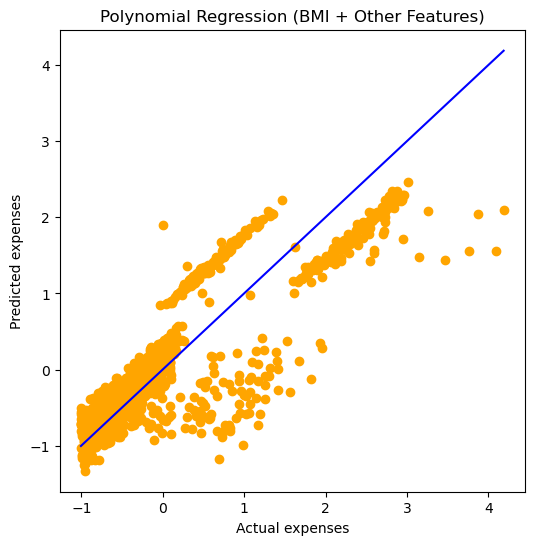

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, color="orange")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="blue")

plt.xlabel("Actual expenses")
plt.ylabel("Predicted expenses")
plt.title("Polynomial Regression (BMI + Other Features)")

plt.show()



##The polynomial regression model was implemented manually to capture the non-linear relationship between the features and expenses.  
The R² score indicates that the manually built model fits the data well and provides good predictions.


# Compare linear and polynomial regression performance 

In [28]:
X = df[["bmi", "age", "children", "is_smoker"]]
y = df["expenses"]


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)



Train: (1066, 4)
Test: (267, 4)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

pred_lin = lin_model.predict(X_test)

r2_lin = r2_score(y_test, pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, pred_lin))

print("Linear R2:", r2_lin)
print("Linear RMSE:", rmse_lin)


Linear R2: 0.7588447910128513
Linear RMSE: 0.48937859169194403


In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

pred_poly = poly_model.predict(X_test_poly)

r2_poly = r2_score(y_test, pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, pred_poly))

print("Poly R2:", r2_poly)
print("Poly RMSE:", rmse_poly)


Poly R2: 0.8628004523626542
Poly RMSE: 0.3691245945696753


In [33]:
print("\nFinal Comparison:")
print("Linear  -> R2:", r2_lin, "RMSE:", rmse_lin)
print("Poly    -> R2:", r2_poly, "RMSE:", rmse_poly)



Final Comparison:
Linear  -> R2: 0.7588447910128513 RMSE: 0.48937859169194403
Poly    -> R2: 0.8628004523626542 RMSE: 0.3691245945696753


###After applying train-test split, polynomial regression performs better than linear regression.
The higher R² score and lower RMSE indicate that the polynomial model captures non-linear relationships more accurately.

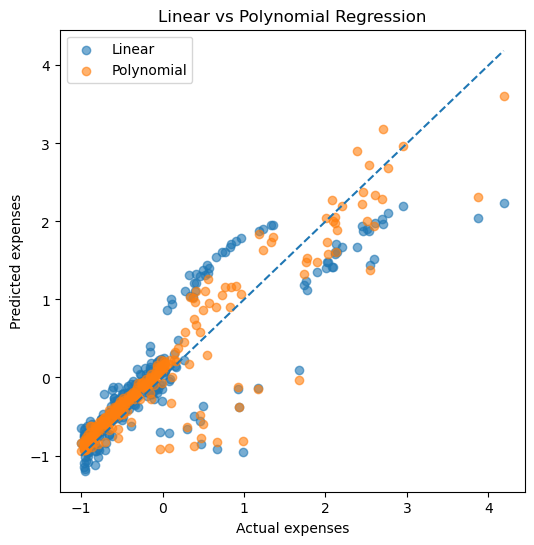

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

# linear points
plt.scatter(y_test, pred_lin, label="Linear", alpha=0.6)

# polynomial points
plt.scatter(y_test, pred_poly, label="Polynomial", alpha=0.6)

# perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")

plt.xlabel("Actual expenses")
plt.ylabel("Predicted expenses")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()


In [1]:
import numpy as np

# X_train me bias column add karna (intercept ke liye)
X_train_bias = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0],1)), X_test])

# beta calculate manually
beta_lin = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# predictions
pred_lin_manual = X_test_bias @ beta_lin


NameError: name 'X_train' is not defined